In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error
import os
import sys
import math
import seaborn as sns

parent_dir = os.path.dirname(os.path.realpath('../../analysis'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

# Import the module from the parent directory
import analysis.model_assessment
import analysis.train_data_analysis
from analysis.model_assessment import *

In [3]:

data = np.load('../../../train_sets/munged_1285.npz')
refls = data['output_rfl']
wv = data['output_wv']
fids = data['output_idx']
#fid_number = data['output_fid']

values_idx, counts_idx = np.unique(fids, return_counts=True)
#indexes = np.unique(fid_number, return_index=True)[1]
#fids = np.array([fid_number[index] for index in sorted(indexes)])

scenes = np.split(refls, 1285)
wv_by_scene = np.split(wv, 1285)
scenes = np.array(scenes)
wv_by_scene = np.array(wv_by_scene)

scenes = scenes[:,:,60:100]


bad = []
for i in range(wv_by_scene.shape[0]):
    scene = wv_by_scene[i].copy()
    if scene[np.where((scene > 6) | (scene < 0))].shape[0] != 0:
        bad.append(i)

wv_by_scene = np.delete(wv_by_scene, bad, axis = 0)
scenes = np.delete(scenes, bad, axis = 0)
print(scenes.shape)
print(wv_by_scene.shape)

(1254, 1242, 40)
(1254, 1242)


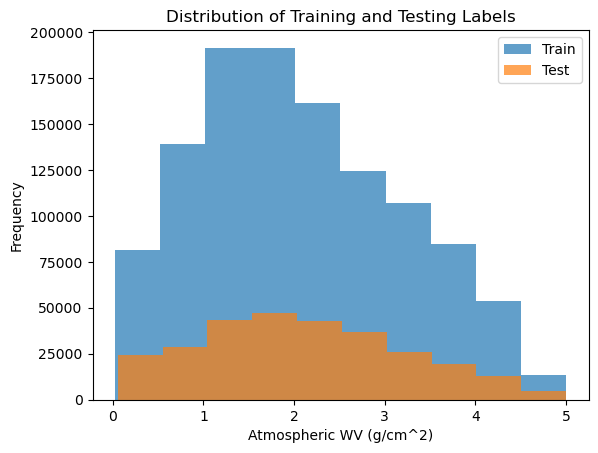

In [4]:
path = '../../../model_results/train_set_1285/all_rf_5_285.npz'
data = np.load(path)
y_pred, y_test, y_train = data['arr_0'], data['arr_1'], data['arr_2']
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')